In [1]:
import torch
import os
import numpy as np
import json
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

%matplotlib inline
plt.rcParams["figure.figsize"] = (16,9)

In [2]:
os.getcwd()

'c:\\Users\\yunjc\\python_jupyter\\bupyeonggu\\bp_road_crack_detection'

# images / json 그려보기

In [3]:
data_path = "D:/data/도로장애물·표면 인지 영상(수도권)/Validation/CRACK/"
annot_path = data_path+"annotations/C_Frontback_B01/"
image_path = data_path+"images/C_Frontback_B01/"

images = os.listdir(image_path)
labels = os.listdir(annot_path)

im_idx = 387

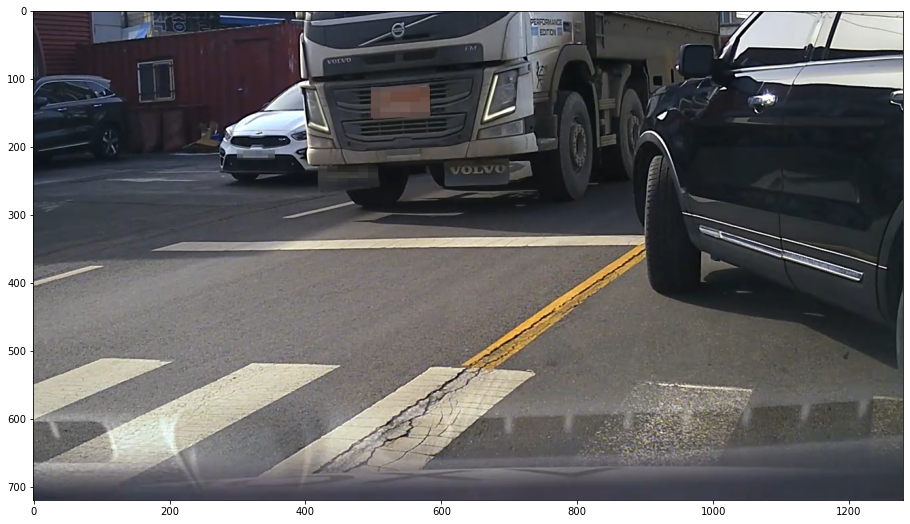

(720, 1280, 3)


In [4]:
img = np.array(Image.open(image_path+"/"+images[im_idx]).convert("RGB"))
plt.imshow(img,cmap="gray")
plt.show()
print(img.shape)

In [5]:
print(images[im_idx])
print(images[im_idx].replace(".png","_PLINE.json"))

V1F_HY_9902_20160212_022751_E_CH1_Seoul_Sun_Frontback_Day_53024.png
V1F_HY_9902_20160212_022751_E_CH1_Seoul_Sun_Frontback_Day_53024_PLINE.json


In [6]:
with open(annot_path+"/"+images[im_idx].replace(".png","_PLINE.json"), "r", encoding="utf8") as f:
        contents = f.read()  # string 타입 json_data = json.loads(contents)
        json_data = json.loads(contents)
    
# json_data

In [7]:
for key in json_data.keys():
    if key == "annotations": continue
    print(f"{key} : {json_data[key]}")
    print()

info : {'description': 'V1F_HY_9902_20160212_022751_E_CH1_Seoul_Sun_Frontback_Day_53024_PLINE JSON file', 'url': '', 'version': '1.0', 'year': 2021, 'contributor': 'Konkuk_university', 'date_created': '2021/05/12'}

images : {'file_name': 'V1F_HY_9902_20160212_022751_E_CH1_Seoul_Sun_Frontback_Day_53024.png', 'height': 720, 'width': 1280, 'id': 1}

categories : [{'id': 1, 'name': 'Crack'}]



In [15]:
temp = np.array(json_data["annotations"][0]["polyline"]).reshape(-1)
tr_pts = np.array([temp[[i for i in range(len(temp)) if i%2==0]], temp[[j for j in range(len(temp)) if j%2!=0]]])
points = tr_pts.T

cv2.polylines(img=img, pts = points, isClosed=False,color=(255,0,0))

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2428: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'cv::polylines'


In [83]:
len(json_data["annotations"])

94

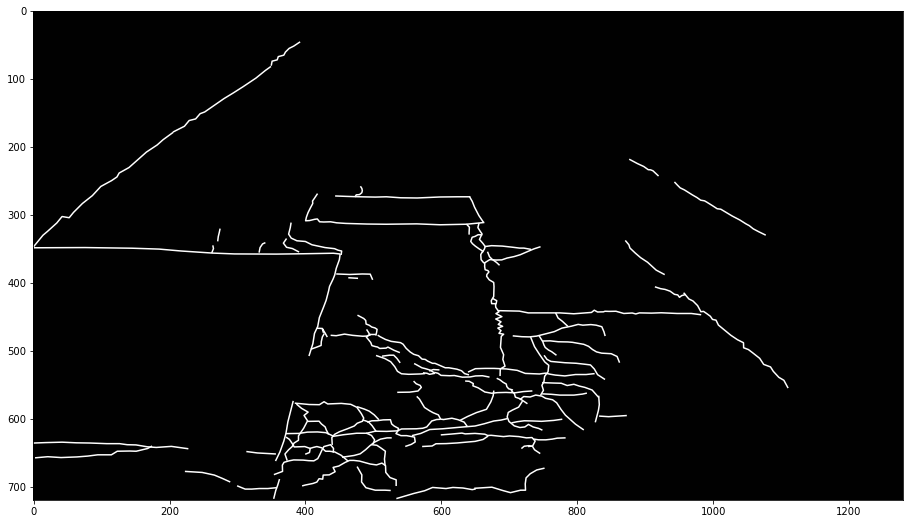

(720, 1280, 3)


In [84]:
lbl = np.array([[[1]*3]*1280]*720)
# lbl[json_data["polyline"]] = 0
plt.imshow(lbl,cmap="gray")
for idx in range(len(json_data["annotations"])):
    temp = np.array(json_data["annotations"][idx]["polyline"]).reshape(-1)
    plt.plot(temp[[i for i in range(len(temp)) if i%2==0]], temp[[j for j in range(len(temp)) if j%2!=0]],
                color="white")
plt.show()    
print(lbl.shape)

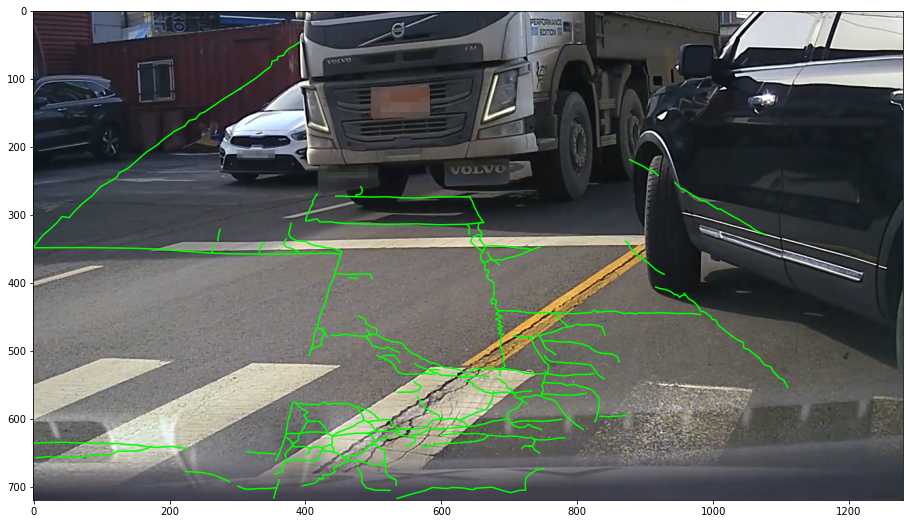

In [88]:
img = np.array(Image.open(image_path+"/"+images[im_idx]).convert("RGB"))
plt.imshow(img,cmap="gray")

# lbl = np.array([[[1]*3]*1280]*720)
# lbl[json_data["polyline"]] = 0
# plt.imshow(lbl,cmap="gray")
for idx in range(len(json_data["annotations"])):
    temp = np.array(json_data["annotations"][idx]["polyline"]).reshape(-1)
    plt.plot(temp[[i for i in range(len(temp)) if i%2==0]], temp[[j for j in range(len(temp)) if j%2!=0]],
                color="lime")

plt.show()

In [ ]:
for idx in range(len(json_data["annotations"])):
    temp = np.array(json_data["annotations"][idx]["polyline"]).reshape(-1)
    plt.scatter(temp[[i for i in range(len(temp)) if i%2==0]], temp[[j for j in range(len(temp)) if j%2!=0]],
                color="white")

In [1]:
# for im_idx in range(112,140,2):
#     img = np.array(Image.open(image_path+"/"+images[im_idx]).convert("RGB"))
#     plt.imshow(img,cmap="gray")

#     with open(annot_path+"/"+images[im_idx].replace(".png","_PLINE.json"), "r", encoding="utf8") as f:
#             contents = f.read()  # string 타입 json_data = json.loads(contents)
#             json_data = json.loads(contents)

#     for idx in range(len(json_data["annotations"])):
#         temp = np.array(json_data["annotations"][idx]["polyline"]).reshape(-1)
#         plt.plot(temp[[i for i in range(len(temp)) if i%2==0]], temp[[j for j in range(len(temp)) if j%2!=0]],
#                     color="lime")

#     plt.show()

# COCO로 json segmentation 그려 보기

In [13]:
from pycocotools.coco import COCO
import skimage.io as io
import pylab
pylab.rcParams["figure.figsize"]=(16,9)

annFile = annot_path+"/"+images[im_idx].replace(".png","_PLINE.json")

coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...


TypeError: string indices must be integers

## COCO Error (TypeError: string indices must be integers)

In [14]:
for js in tqdm(labels):
    annFile_foot = annot_path+"/"+js
    annFile_foot_modified = annot_path.replace("annotations","anns_modifies")+"/"+js

    with open(annFile_foot) as f:
        data = json.loads(f.read())
        # print(data.keys())
        
        #add additional brackets to categories
        data['images'] = [data['images']]
        
        #export
        with open(annFile_foot_modified, 'w+') as ff:
            ff.write(json.dumps(data))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [15]:
annFile = annot_path.replace("annotations","anns_modifies")+"/"+images[im_idx].replace(".png","_PLINE.json")
print(annFile)
coco=COCO(annFile)

D:/data/도로장애물·표면 인지 영상(수도권)/Validation/CRACK/anns_modifies/C_Frontback_B01//V2F_HY_0108_20210115_143623_N_CH1_Seoul_Sun_Frontback_Day_71675_PLINE.json
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [16]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
Crack



In [17]:
catIds = coco.getCatIds(catNms=['Crack']);
imgIds = coco.getImgIds(catIds=catIds);

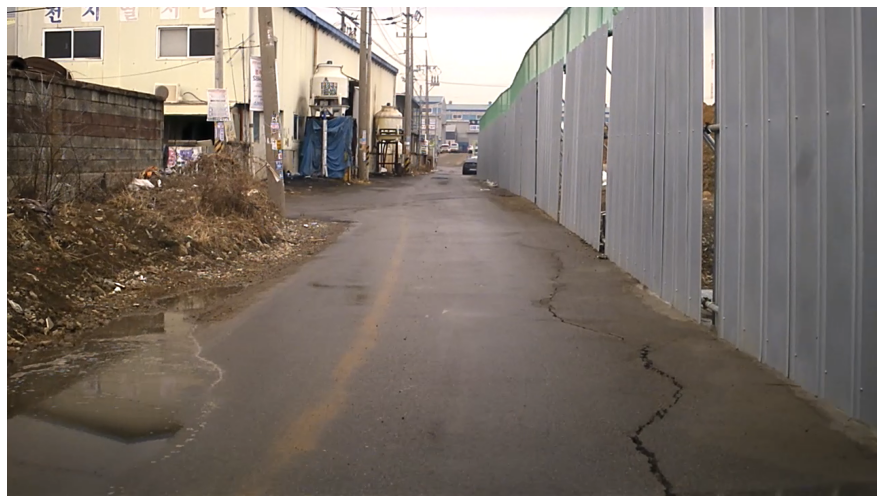

In [18]:
Img = io.imread(image_path+"/"+images[im_idx])
plt.axis('off')
plt.imshow(Img)

[1, 2, 3]


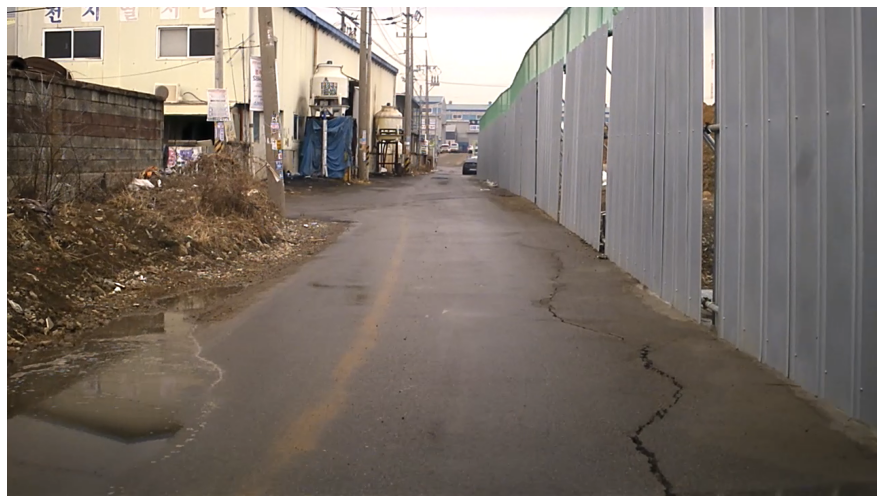

In [19]:
plt.imshow(Img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=imgIds, catIds=catIds, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

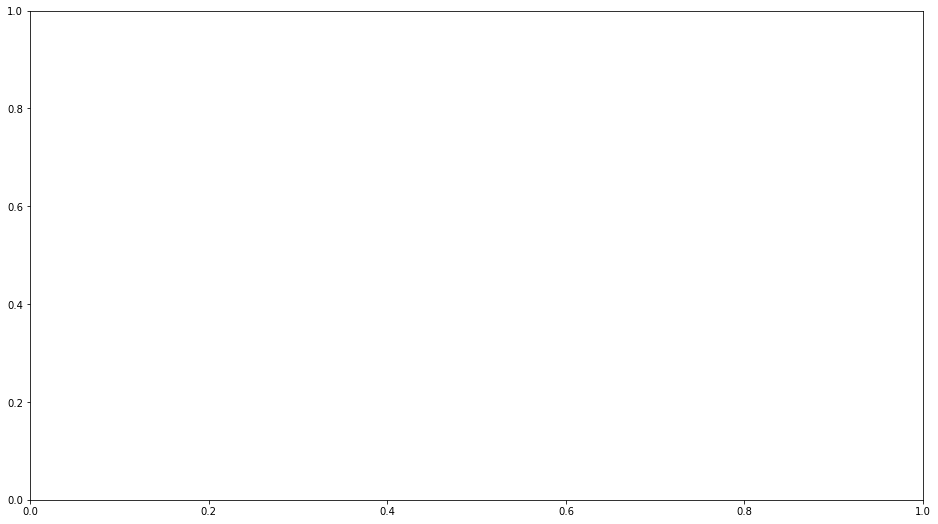

In [24]:
coco.showAnns(anns)

In [2]:
# anns